In [2]:
import pandas as pd
import json
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from functions.utils import load_json, load_logs_from_json
from classes.GeneticA import GeneticCharacteristics, GeneticAlgorithm
from classes.GridSearch import GridSearch
from classes.DPSolver import DPSolver


## Запускаем GridSearch ##

In [2]:
initial_conditions = load_json("test_conditions/initial_conditions_10_20.json")
    # Пример использования GridSearch
grid_search = GridSearch(
    task_conditions=initial_conditions,  # Используем первый набор условий
    param_grid={
        'max_iterations': [15000],
        'epsilon': [0],
        'population_size': [50],
        'max_attempts': [1000],
        'size_to_generate': [100, 200],
        'desired_population_size': [50, 100],
        'change_to_mutation': [0.1],
        'tournament_size': [5, 10]
    }
)
best_params = grid_search.find_best_parameters(filename="./results/best_params.json")
grid_search.save_logs_to_file(filename="./results/logs.json")

Evaluating combination: {'max_iterations': 15000, 'epsilon': 0, 'population_size': 50, 'max_attempts': 1000, 'size_to_generate': 100, 'desired_population_size': 50, 'change_to_mutation': 0.1, 'tournament_size': 5}
test case: 1
Result fitness DP: 87418, Result fitness GA: 87418
test case: 2
Result fitness DP: 84881, Result fitness GA: 66541
test case: 3
Result fitness DP: 69164, Result fitness GA: 38303
test case: 4
Result fitness DP: 63304, Result fitness GA: 56259
test case: 5
Result fitness DP: 249178, Result fitness GA: 182572
test case: 6
Result fitness DP: 62338, Result fitness GA: 62338
test case: 7
Result fitness DP: 112263, Result fitness GA: 112025
test case: 8
Result fitness DP: 90582, Result fitness GA: 69618
test case: 9
Result fitness DP: 277194, Result fitness GA: 205864
test case: 10
Result fitness DP: 91210, Result fitness GA: 91210
Best score: 21538.4, Cur score: 21538.4
Evaluating combination: {'max_iterations': 15000, 'epsilon': 0, 'population_size': 50, 'max_attempt

In [3]:
load_logs_from_json("./results/logs.json").sort_values(by='final_optimization_score')

Успешно загружено 8 записей из ./results/logs.json


,max_iterations,epsilon,population_size,max_attempts,size_to_generate,desired_population_size,change_to_mutation,tournament_size,final_optimization_score,test case 1,...,test case 3,test case 4,test case 5,test case 6,test case 7,test case 8,test case 9,test case 10,ga_time,dp_time
5,15000,0,50,1000,200,50,0.1,10,445.825078,0,...,29446,7799,64584,0,605,20090,57896,0,182.760004,0.131197
1,15000,0,50,1000,100,50,0.1,10,449.474137,0,...,30056,7741,62810,0,0,20686,61432,0,187.464921,0.137317
0,15000,0,50,1000,100,50,0.1,5,464.094818,0,...,30861,7045,66606,0,238,20964,71330,0,123.947576,0.137464
4,15000,0,50,1000,200,50,0.1,5,469.937230,0,...,29576,6755,70720,0,1012,20626,73270,0,120.360861,0.131790
7,15000,0,50,1000,200,100,0.1,10,1012.687514,73442,...,49668,47156,230357,51868,95536,71924,256712,75679,309.696665,0.132138
3,15000,0,50,1000,100,100,0.1,10,1012.851420,73963,...,49722,46779,230121,51963,95608,71867,256946,75973,1241.313570,0.131020
6,15000,0,50,1000,200,100,0.1,5,1013.103647,73788,...,49584,46729,230231,51690,95592,72353,256985,76161,180.898518,0.132129
2,15000,0,50,1000,100,100,0.1,5,1013.225049,73873,...,49711,46899,230268,51773,95415,72173,257105,75900,187.084606,0.136550


## По лучшей конфигурации считаем значения ##


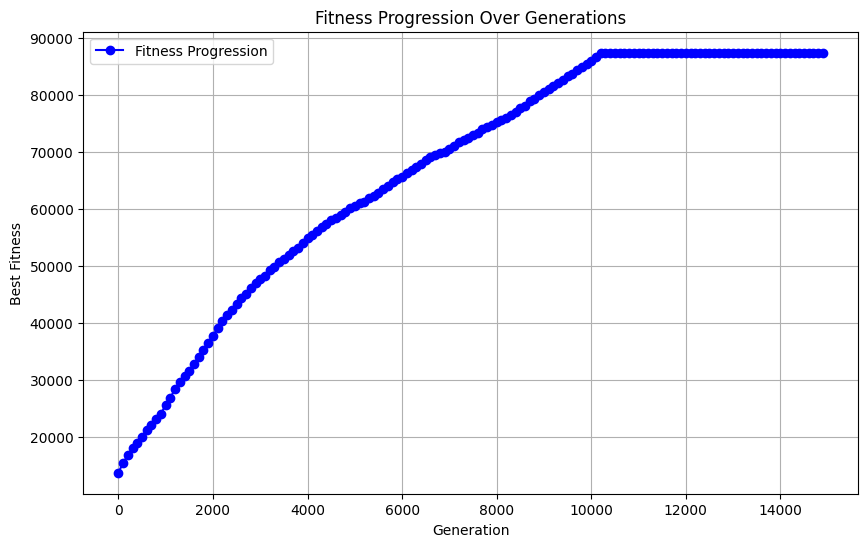

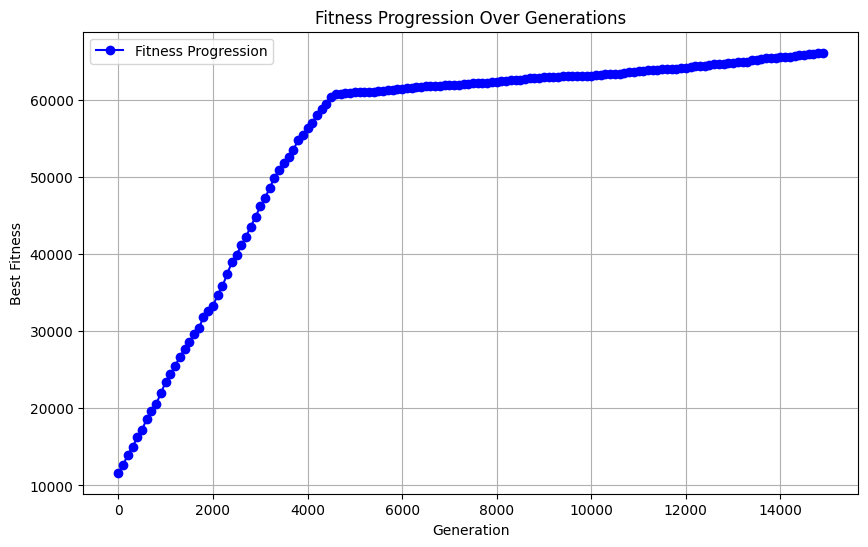

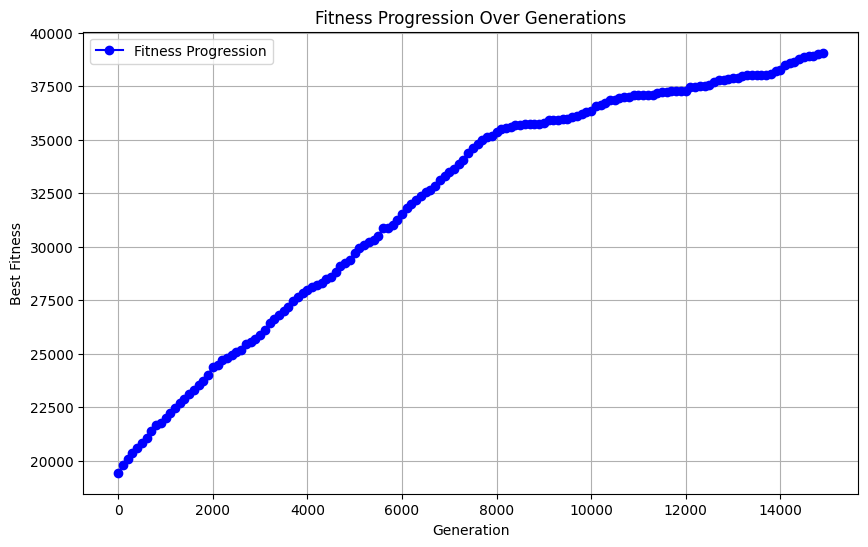

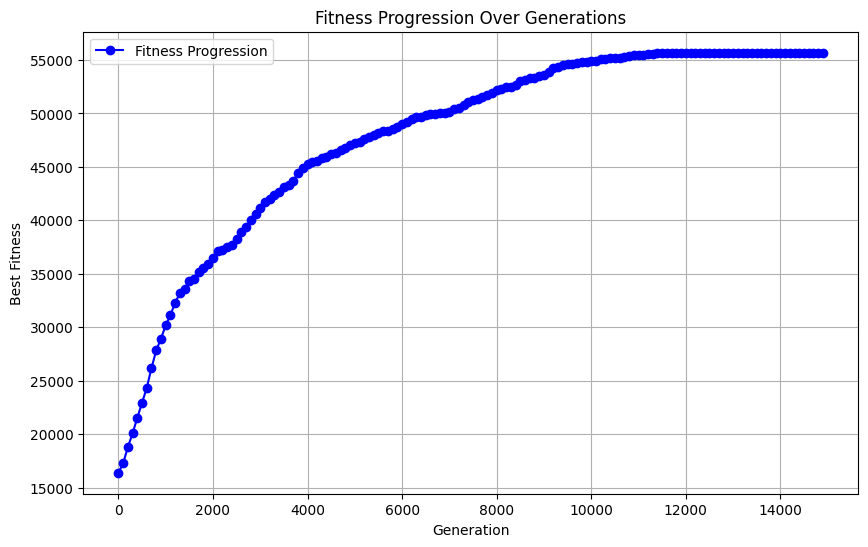

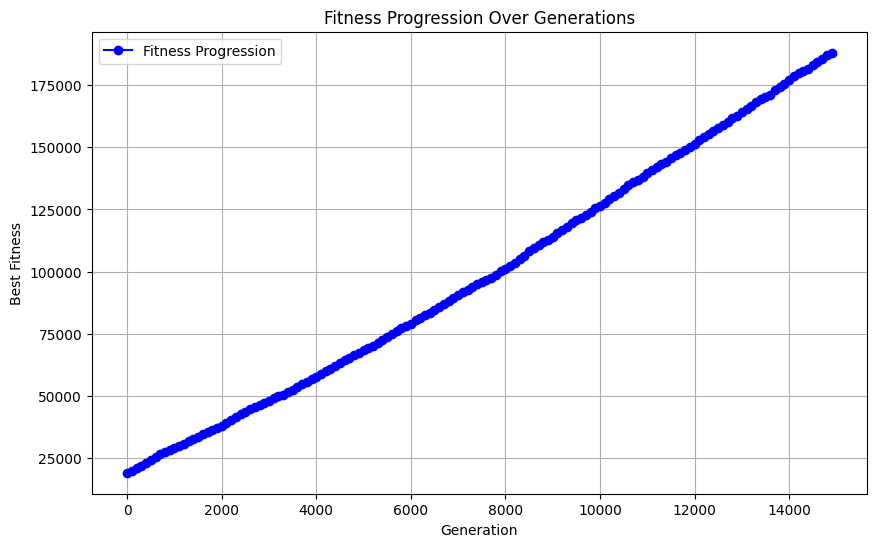

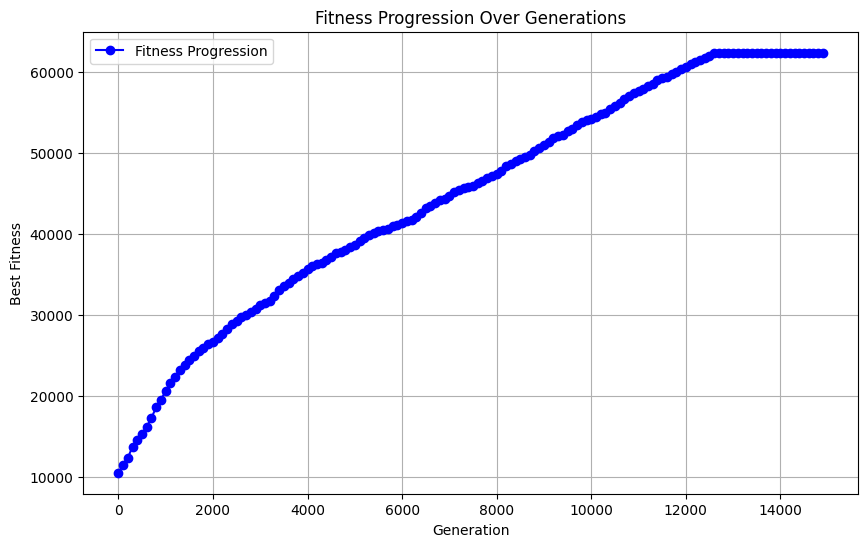

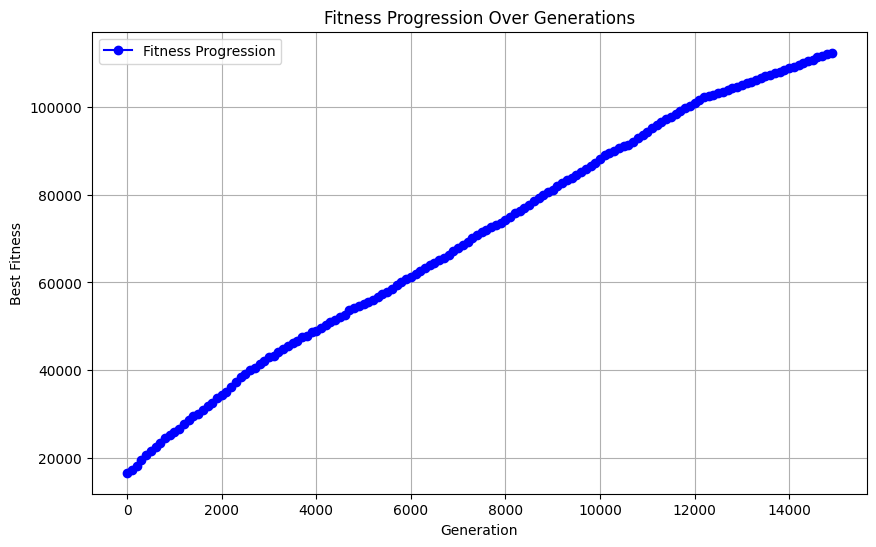

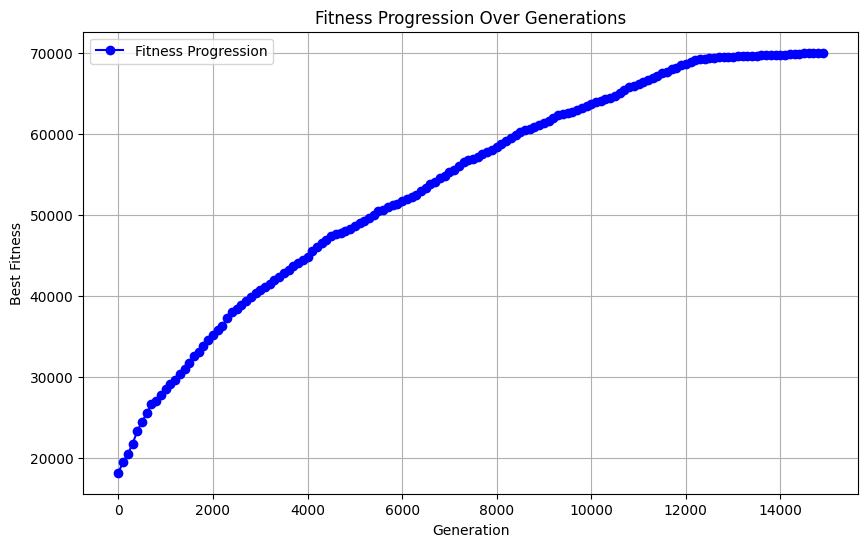

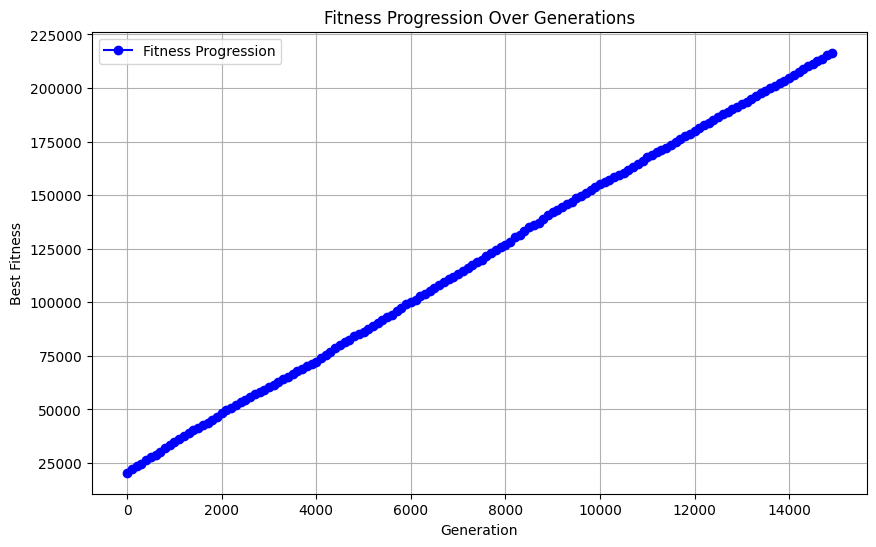

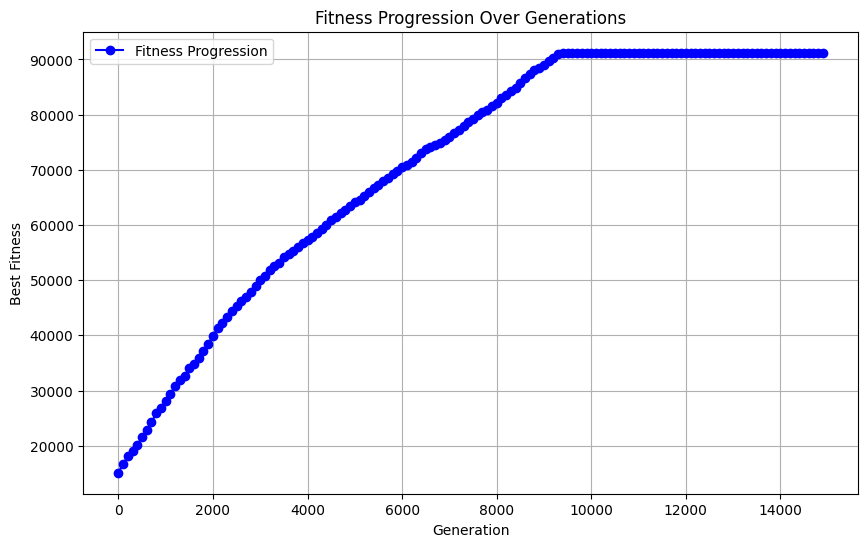

In [4]:
initial_conditions = load_json("test_conditions/initial_conditions_10_20.json")
best_params = load_json("results/best_params.json")

for condition in initial_conditions:

    genetic_characteristics = GeneticCharacteristics(
        population_size=best_params['population_size'],
        min_vals=condition['min_vals'],
        weights=condition['weights'],
        costs=condition['costs'],
        max_weight=condition['max_weight'],
        max_iterations=best_params['max_iterations'],
        epsilon=best_params['epsilon'],
        max_attempts=best_params['max_attempts'],
        size_to_generate=best_params['size_to_generate'],
        change_to_mutation=best_params['change_to_mutation'],
        tournament_size=best_params['tournament_size'],
        desired_population_size=best_params['desired_population_size']
    )
    
    genetic_algorithm = GeneticAlgorithm(genetic_characteristics)
    
    result_fitness_ga, result_ga = genetic_algorithm.start_algorithm(show_progression_type='plot')
    
    

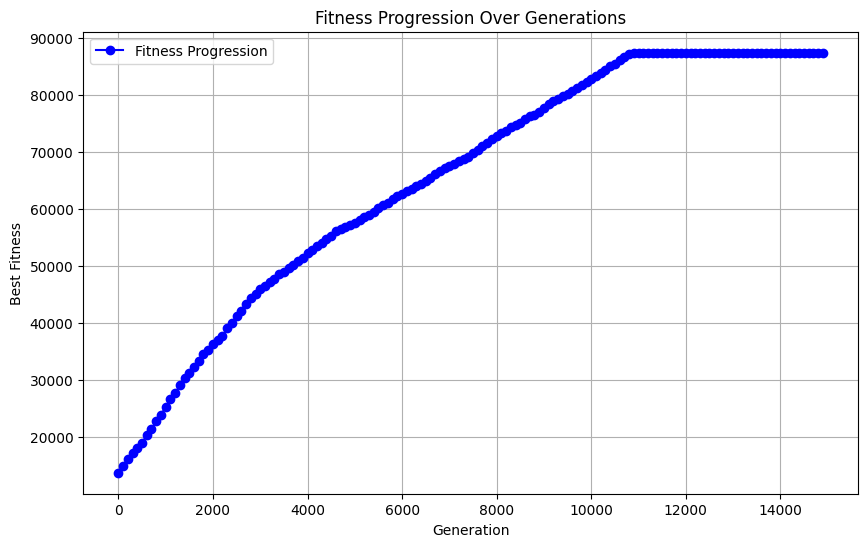

min_vals: [1, 7, 7, 0, 9, 1, 10, 0, 4, 6, 9, 6, 9, 0]
costs: [28, 33, 42, 50, 25, 26, 40, 36, 31, 31, 40, 29, 30, 46]
weights: [30, 41, 8, 16, 10, 10, 32, 37, 40, 20, 30, 32, 35, 4]
max_weight: 9250
DP fitness: [1, 7, 7, 0, 9, 1, 10, 0, 4, 6, 9, 6, 9, 1850], Fitness DP: 87418
GA fitness: Entity(current_state=[1, 7, 7, 0, 9, 1, 10, 0, 4, 6, 9, 6, 9, 1850], current_fitness=87418, weight=9250), Fitness GA: 87418


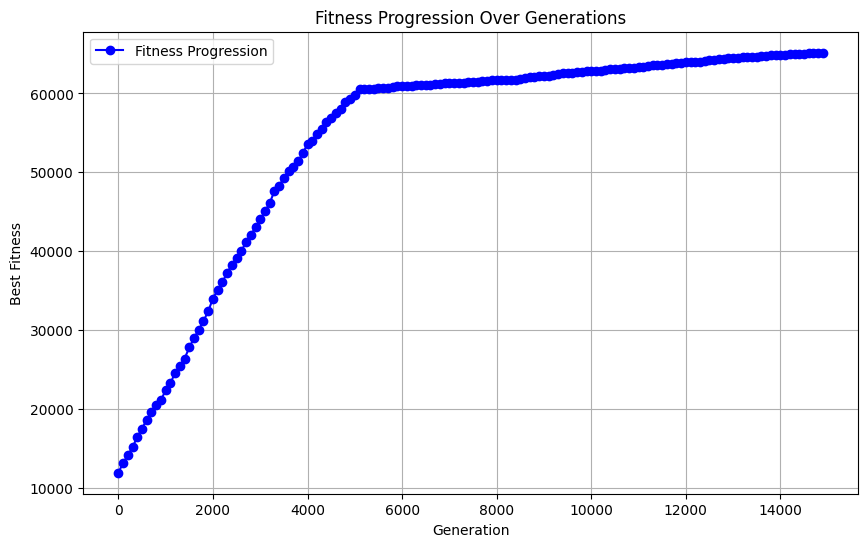

min_vals: [3, 10, 9, 2, 2, 9, 4, 4, 6, 1]
costs: [50, 36, 44, 41, 31, 45, 44, 32, 44, 34]
weights: [5, 13, 27, 49, 12, 32, 35, 23, 31, 2]
max_weight: 6090
DP fitness: [3, 10, 9, 2, 2, 9, 4, 4, 6, 2437], Fitness DP: 84881
GA fitness: Entity(current_state=[564, 10, 9, 2, 2, 9, 4, 4, 6, 1034], current_fitness=65229, weight=6089), Fitness GA: 65229


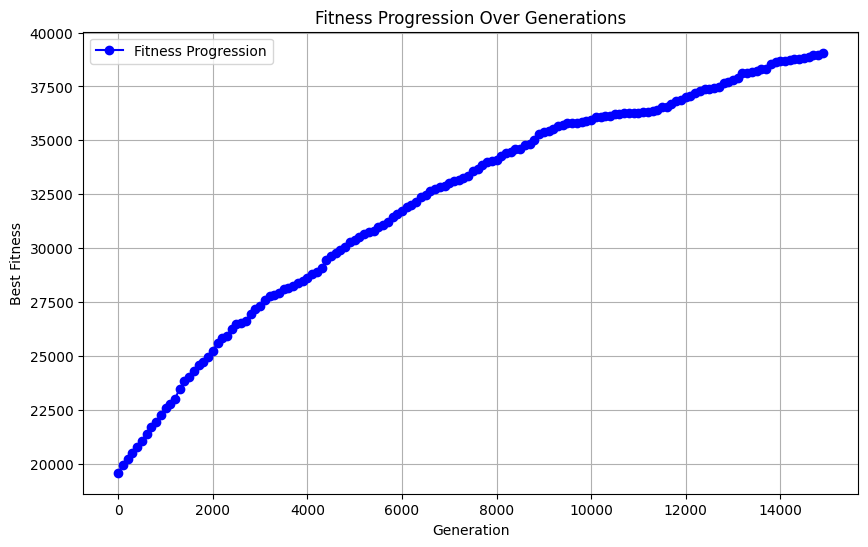

min_vals: [9, 6, 10, 0, 1, 6, 2, 0, 5, 7, 10, 10, 1, 9, 4, 0, 3, 2, 10]
costs: [33, 48, 34, 41, 33, 38, 29, 37, 43, 35, 49, 37, 45, 27, 41, 34, 49, 27, 31]
weights: [22, 45, 36, 31, 24, 33, 28, 21, 46, 36, 42, 25, 23, 20, 38, 15, 42, 5, 29]
max_weight: 15195
DP fitness: [9, 6, 10, 0, 1, 6, 2, 0, 5, 7, 10, 10, 1, 9, 4, 0, 3, 2433, 10], Fitness DP: 69164
GA fitness: Entity(current_state=[9, 6, 10, 0, 1, 6, 2, 4, 5, 7, 10, 10, 274, 9, 4, 173, 3, 641, 10], current_fitness=39095, weight=15192), Fitness GA: 39095


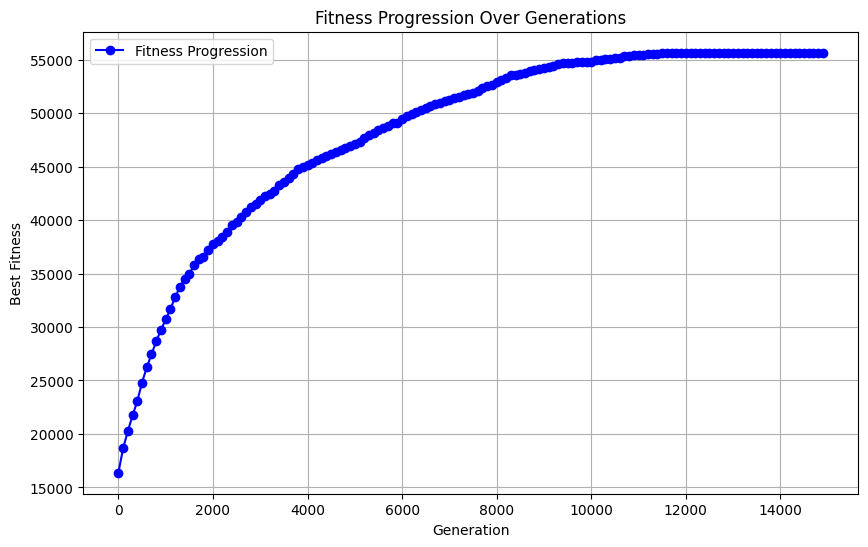

min_vals: [4, 2, 1, 7, 10, 8, 1, 1, 8, 6, 8, 2, 2, 10, 4, 9, 7]
costs: [41, 27, 27, 43, 34, 48, 29, 29, 36, 35, 40, 31, 44, 26, 33, 44, 39]
weights: [9, 41, 5, 7, 43, 16, 49, 24, 5, 37, 11, 32, 33, 22, 33, 28, 5]
max_weight: 9610
DP fitness: [4, 2, 1, 8, 10, 8, 1, 1, 8, 6, 8, 2, 2, 10, 4, 9, 1543], Fitness DP: 63304
GA fitness: Entity(current_state=[4, 2, 1, 668, 10, 8, 1, 1, 8, 6, 8, 2, 2, 10, 4, 9, 619], current_fitness=55648, weight=9609), Fitness GA: 55648


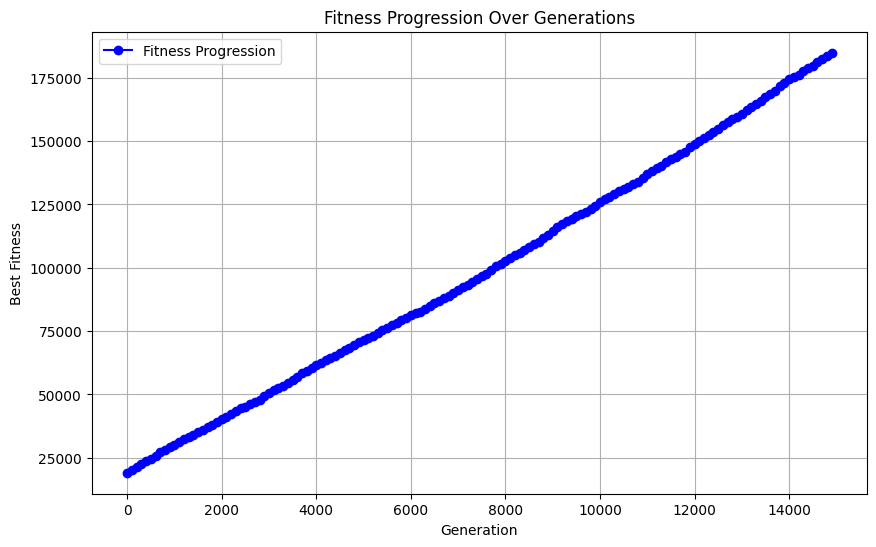

min_vals: [7, 6, 7, 7, 8, 9, 1, 3, 4, 4, 3, 10, 1, 1, 8, 8, 9]
costs: [38, 42, 25, 44, 38, 44, 38, 43, 30, 38, 25, 39, 45, 37, 35, 38, 43]
weights: [31, 33, 40, 2, 25, 18, 10, 30, 12, 34, 49, 21, 38, 42, 41, 41, 38]
max_weight: 13950
DP fitness: [7, 6, 7, 5587, 8, 9, 1, 3, 4, 4, 3, 10, 1, 1, 8, 8, 9], Fitness DP: 249178
GA fitness: Entity(current_state=[7, 6, 7, 3910, 8, 92, 187, 3, 4, 4, 3, 10, 1, 1, 8, 8, 9], current_fitness=186110, weight=13950), Fitness GA: 186110


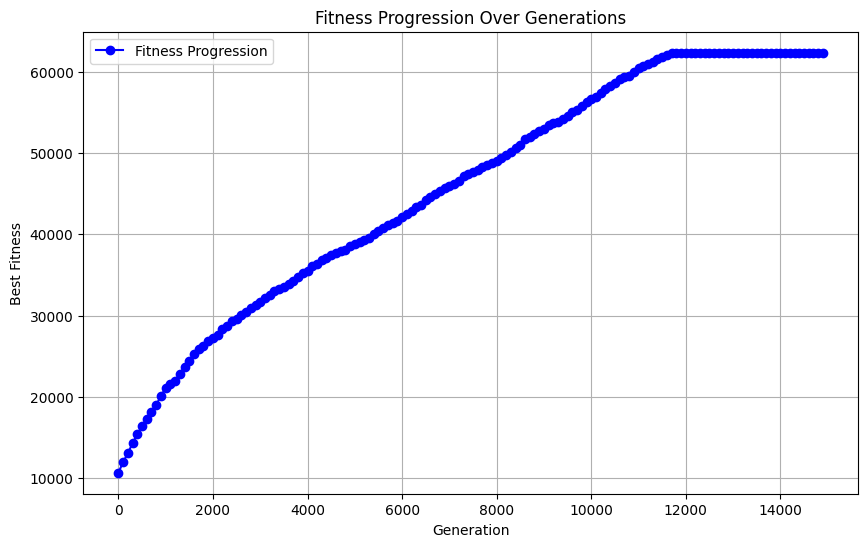

min_vals: [0, 7, 5, 0, 10, 3, 2, 7, 4, 7, 1, 1, 4, 4, 8]
costs: [37, 34, 31, 36, 31, 40, 43, 37, 28, 25, 30, 37, 38, 37, 35]
weights: [28, 33, 21, 45, 7, 49, 12, 3, 38, 17, 8, 8, 16, 40, 14]
max_weight: 6105
DP fitness: [0, 7, 5, 0, 10, 3, 2, 1635, 4, 7, 1, 1, 4, 4, 8], Fitness DP: 62338
GA fitness: Entity(current_state=[0, 7, 5, 0, 10, 3, 2, 1635, 4, 7, 1, 1, 4, 4, 8], current_fitness=62338, weight=6105), Fitness GA: 62338


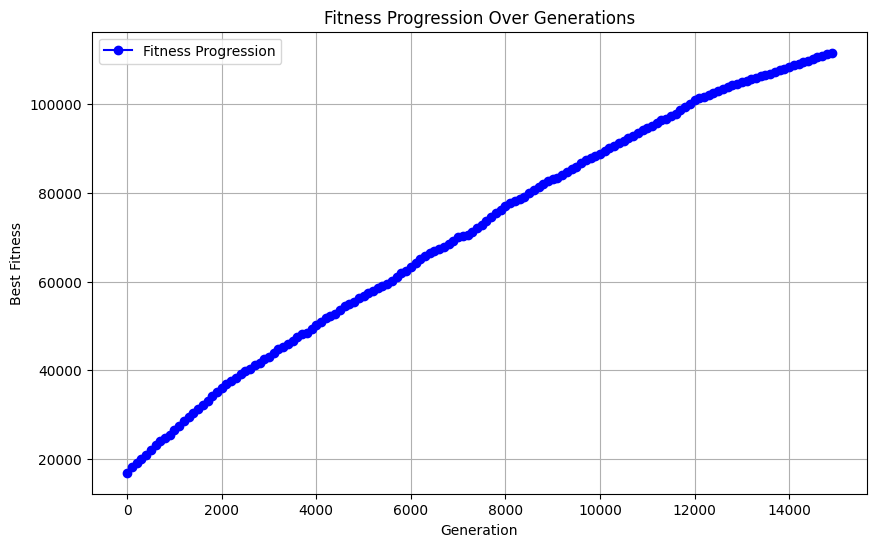

min_vals: [10, 8, 4, 10, 4, 5, 2, 4, 2, 0, 6, 3, 9, 7, 2, 0, 8, 2, 10]
costs: [27, 36, 38, 33, 31, 28, 45, 49, 28, 34, 43, 48, 35, 40, 50, 27, 36, 32, 29]
weights: [39, 14, 40, 21, 32, 29, 43, 4, 41, 34, 32, 45, 24, 18, 22, 20, 11, 21, 5]
max_weight: 11110
DP fitness: [10, 8, 4, 10, 4, 5, 2, 2226, 2, 0, 6, 3, 9, 7, 2, 0, 8, 2, 10], Fitness DP: 112263
GA fitness: Entity(current_state=[10, 8, 4, 10, 4, 5, 2, 2224, 2, 0, 6, 3, 9, 7, 2, 0, 8, 2, 11], current_fitness=112194, weight=11107), Fitness GA: 112194


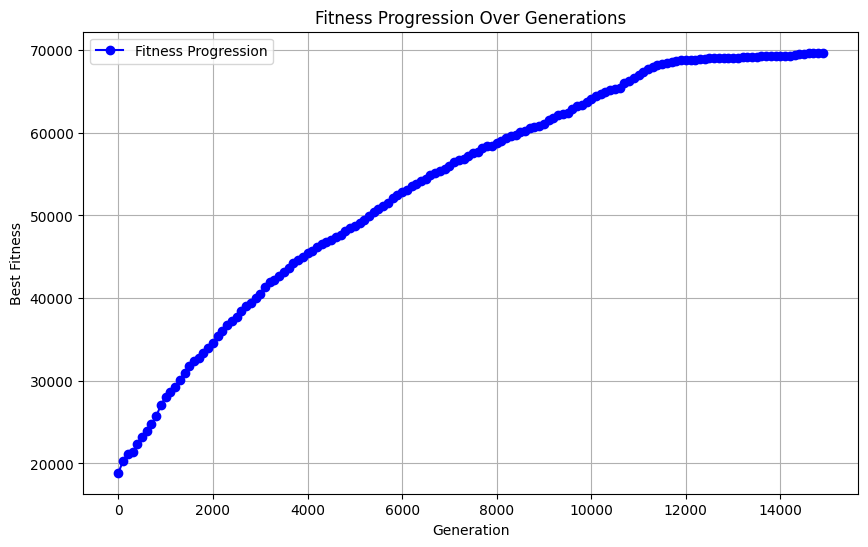

min_vals: [2, 2, 3, 2, 9, 6, 3, 9, 8, 6, 8, 3, 10, 9, 9]
costs: [35, 33, 25, 39, 44, 46, 49, 37, 39, 26, 45, 40, 47, 27, 48]
weights: [3, 6, 49, 32, 6, 25, 19, 13, 8, 2, 42, 28, 40, 6, 13]
max_weight: 8370
DP fitness: [2, 2, 3, 2, 9, 6, 3, 9, 8, 3354, 8, 3, 10, 9, 9], Fitness DP: 90582
GA fitness: Entity(current_state=[782, 2, 3, 2, 532, 6, 3, 9, 8, 615, 8, 3, 10, 9, 9], current_fitness=69680, weight=8370), Fitness GA: 69680


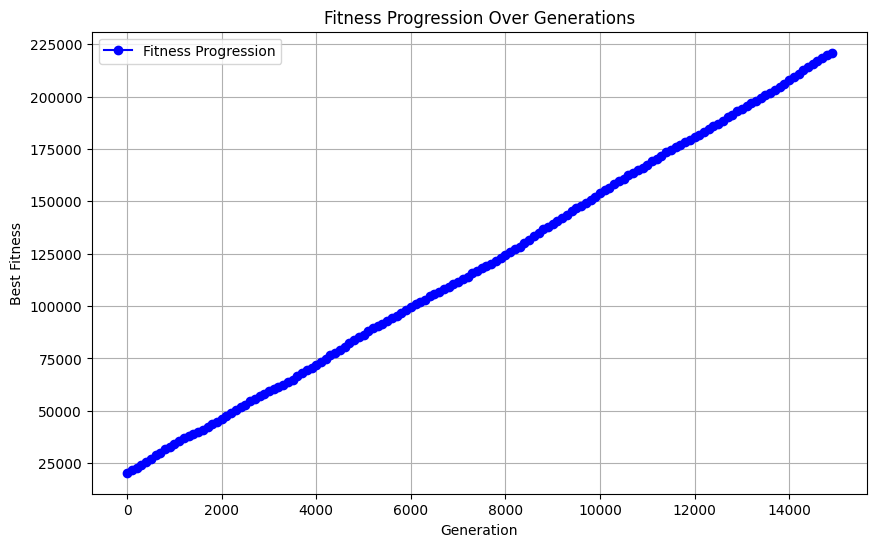

min_vals: [6, 9, 8, 6, 0, 0, 4, 5, 9, 4, 10, 2, 10, 9, 6, 7, 8, 0]
costs: [42, 41, 48, 43, 48, 35, 28, 30, 44, 41, 31, 26, 33, 41, 40, 44, 50, 35]
weights: [22, 22, 14, 36, 41, 40, 15, 47, 35, 28, 47, 30, 28, 42, 7, 15, 2, 36]
max_weight: 13655
DP fitness: [6, 9, 8, 6, 0, 0, 4, 5, 9, 4, 10, 2, 10, 9, 6, 7, 5470, 0], Fitness DP: 277194
GA fitness: Entity(current_state=[6, 9, 116, 6, 0, 0, 4, 5, 9, 4, 10, 2, 10, 9, 170, 7, 4138, 0], current_fitness=222338, weight=13651), Fitness GA: 222338


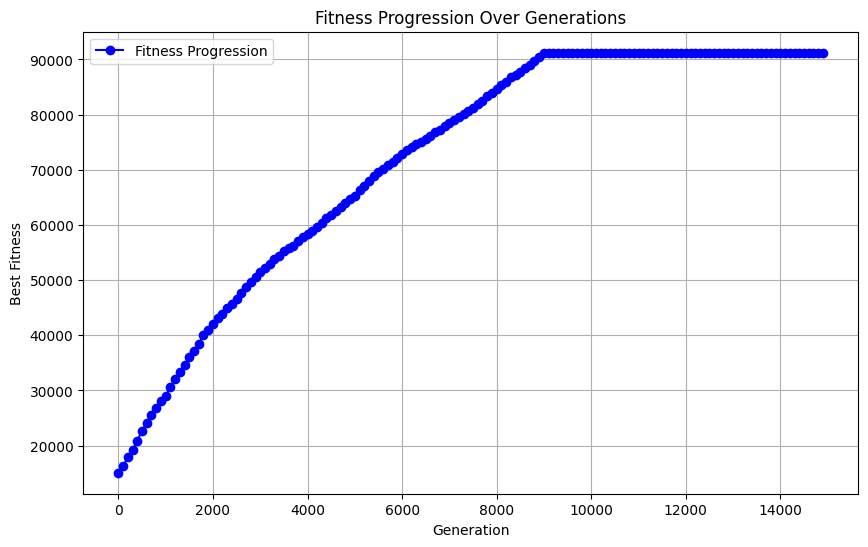

min_vals: [2, 2, 0, 2, 6, 1, 1, 5, 7, 6, 10, 8, 6, 3, 1, 10, 5]
costs: [42, 37, 28, 26, 43, 50, 26, 42, 43, 48, 45, 41, 27, 42, 31, 25, 44]
weights: [47, 13, 44, 43, 37, 5, 23, 29, 42, 13, 12, 46, 42, 18, 41, 28, 24]
max_weight: 11040
DP fitness: [2, 2, 0, 2, 6, 1767, 1, 5, 7, 6, 10, 8, 6, 3, 1, 10, 5], Fitness DP: 91210
GA fitness: Entity(current_state=[2, 2, 0, 2, 6, 1767, 1, 5, 7, 6, 10, 8, 6, 3, 1, 10, 5], current_fitness=91210, weight=11038), Fitness GA: 91210


In [6]:
initial_conditions = load_json("test_conditions/initial_conditions_10_20.json")
best_params = load_json("results/best_params.json")

for condition in initial_conditions:

    genetic_characteristics = GeneticCharacteristics(
        population_size=best_params['population_size'],
        min_vals=condition['min_vals'],
        weights=condition['weights'],
        costs=condition['costs'],
        max_weight=condition['max_weight'],
        max_iterations=best_params['max_iterations'],
        epsilon=best_params['epsilon'],
        max_attempts=best_params['max_attempts'],
        size_to_generate=best_params['size_to_generate'],
        change_to_mutation=best_params['change_to_mutation'],
        tournament_size=best_params['tournament_size'],
        desired_population_size=best_params['desired_population_size']
    )
    
    genetic_algorithm = GeneticAlgorithm(genetic_characteristics)
    dpsolver = DPSolver(constraints=condition['min_vals'],weights=condition['weights'],costs=condition['costs'],max_weight=condition['max_weight'])
    result_fitness_dp, result_dp = dpsolver.solve()
    
    result_fitness_ga, result_ga = genetic_algorithm.start_algorithm(show_progression_type='plot')
    
    for keys in condition.keys():
        print(f'{keys}: {condition[keys]}')
    
    print(f'DP fitness: {result_dp}, Fitness DP: {result_fitness_dp}')
    print(f'GA fitness: {result_ga}, Fitness GA: {result_fitness_ga}')